# Autapses in the Layer 2/3 volume

## Methodology
Autapses (a neuron that forms a synapse on itself) were identified in synapse table (pni_synapses_v185.csv) by a simple method of creating a new column of values obtained by subtracting (pre_root_id - post_root_id). Any potential autapse would have a value of zero and all other non-zero values are ignored. Vascular and glial cell ids were removed in Excel through a vlookup function, resulting in 27 potential candidates. Each of these was manually-evaluated by looking at the electron micrographs in neuronglancer to determine if the autapse was true. Results were annotated and summarized and exported as a csv file (autapses_rm_nonneuronal.csv), as used here in this notebook.

## Summary of results
Three cases were true autapses (shown below); the remaining were segmentation errors. Most segmentation errors misidentifying a membrane (e.g., nuclear, ER, neuronal primary cilia filament), volume edge artifacts, and two spines in contact with one another but were mis-segmented as synapses where a passing axon should have been identified as the pre-synaptic cell.

In [1]:
import pandas as pd

In [2]:
autapses = pd.read_csv("autapses_rm_nonneuronal.csv")
autapses

,Unnamed: 0,id,pre_root_id,post_root_id,cleft_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,pre_cell_type,pre_cell_subtype,post_cell_type,post_cell_subtype,autapse,seg_err,seg_err_note,manual_inspection_notes
0,3123371,2509235,648518346349528994,648518346349528994,671,83186,55184,1047,inhibitory,basket,inhibitory,basket,True,False,none,this is a true autapse
1,187561,323093,648518346349528939,648518346349528939,595,46035,61913,561,na,na,na,na,False,True,nuclear membrane,"nuclear membrane, not an autapse"
2,1381822,1788948,648518346349539806,648518346349539806,282,49980,47802,1673,pyramidal,pyramidal cell,pyramidal,pyramidal cell,False,True,two spines in contact with axon,"this is an interesting contact of two spines, ..."
3,3220530,1638172,648518346349530766,648518346349530766,250,45516,71130,942,pyramidal,pyramidal cell,pyramidal,pyramidal cell,False,True,nuclear membrane,"probably a nuclear membrane, not an autapse"
4,1119231,1465951,648518346349536939,648518346349536939,219,66602,46750,791,na,na,na,na,False,True,two spines in contact with axon,"this is an interesting contact of two spines, ..."
5,2927193,1361061,648518346349538718,648518346349538718,203,86050,39612,1756,pyramidal,pyramidal cell,pyramidal,pyramidal cell,True,False,none,this is a true autapse
6,709761,906051,648518346349539506,648518346349539506,145,85476,58000,366,pyramidal,pyramidal cell,pyramidal,pyramidal cell,False,True,two spines in contact with axon,"this is an interesting contact of two spines, ..."
7,105577,866619,648518346349539853,648518346349539853,141,100242,47382,220,pyramidal,pyramidal cell,pyramidal,pyramidal cell,True,False,none,this is a true autapse
8,3117032,1780461,648518346349528939,648518346349528939,141,46004,61833,563,na,na,na,na,False,True,nuclear membrane,this is not a true synapse; it is an interesti...
9,489042,700236,648518346349537389,648518346349537389,123,108754,71308,519,inhibitory,bipolar,inhibitory,bipolar,False,True,ER,this is not a true synapse; looks like ER in a...


In [3]:
len(autapses)

27

In [4]:
autapses["autapse"].value_counts()

False    24
True      3
Name: autapse, dtype: int64

<AxesSubplot:>

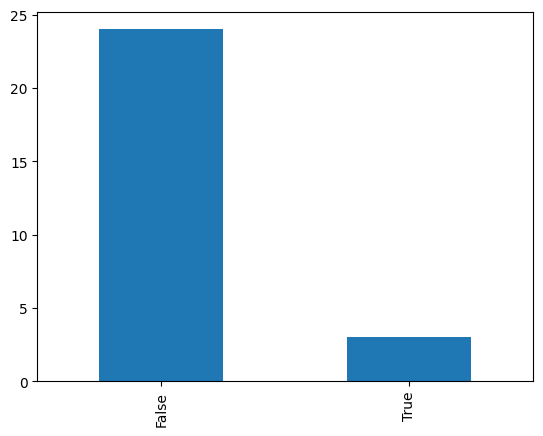

In [5]:
# There are three true autapses in the volume and 24 erroneous/mis-assigned synapses
autapses["autapse"].value_counts().plot.bar()

In [6]:
# Types of segmentation errors
autapses["seg_err_note"].value_counts()

nuclear membrane                   9
two spines in contact with axon    6
none                               3
edge artifact                      3
ER                                 2
neuronal primary cilia filament    2
uncertain                          1
folded dendritic spine             1
Name: seg_err_note, dtype: int64

<AxesSubplot:title={'center':'Autapse Segmentation Errors'}>

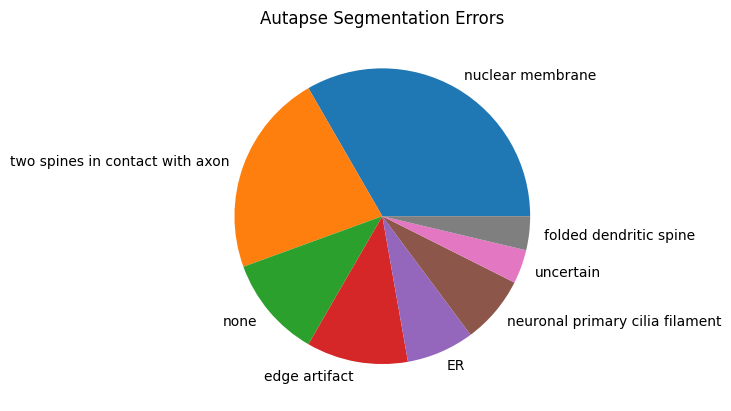

In [7]:
autapses["seg_err_note"].value_counts().plot.pie(ylabel="", title="Autapse Segmentation Errors")

In [8]:
# list of true autapses
true_autapse = autapses["autapse"] == bool(True)
autapses.loc[true_autapse]

,Unnamed: 0,id,pre_root_id,post_root_id,cleft_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,pre_cell_type,pre_cell_subtype,post_cell_type,post_cell_subtype,autapse,seg_err,seg_err_note,manual_inspection_notes
0,3123371,2509235,648518346349528994,648518346349528994,671,83186,55184,1047,inhibitory,basket,inhibitory,basket,True,False,none,this is a true autapse
5,2927193,1361061,648518346349538718,648518346349538718,203,86050,39612,1756,pyramidal,pyramidal cell,pyramidal,pyramidal cell,True,False,none,this is a true autapse
7,105577,866619,648518346349539853,648518346349539853,141,100242,47382,220,pyramidal,pyramidal cell,pyramidal,pyramidal cell,True,False,none,this is a true autapse


# Visualization examples

## True autapse 1: inhibitory basket neuron with cell id 648518346349528994 

### View in [neuroglancer](https://neuromancer-seung-import.appspot.com/#!%7B%22layers%22:%5B%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v0/son_of_alignment_v15_rechunked%22%2C%22type%22:%22image%22%2C%22blend%22:%22default%22%2C%22shaderControls%22:%7B%7D%2C%22name%22:%22EM%22%7D%2C%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v185/seg%22%2C%22type%22:%22segmentation%22%2C%22selectedAlpha%22:0.51%2C%22segments%22:%5B%22648518346349528994%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22cell_segmentation_v185%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-clefts/mip1_d2_1175k%22%2C%22type%22:%22segmentation%22%2C%22segmentColors%22:%7B%223623767%22:%22#5c61ff%22%7D%2C%22segments%22:%5B%223623767%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22synapses%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-mito/seg_191220%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22mitochondria%22%2C%22visible%22:false%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-nuclei/seg%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22nuclei%22%7D%5D%2C%22navigation%22:%7B%22pose%22:%7B%22position%22:%7B%22voxelSize%22:%5B4%2C4%2C40%5D%2C%22voxelCoordinates%22:%5B83186%2C55184%2C1046%5D%7D%7D%2C%22zoomFactor%22:5.984479141868939%7D%2C%22perspectiveOrientation%22:%5B0.19795255362987518%2C0.8017028570175171%2C0.033653996884822845%2C0.5629872679710388%5D%2C%22perspectiveZoom%22:113.08643733910445%2C%22showSlices%22:false%2C%22selectedLayer%22:%7B%22layer%22:%22synapses%22%2C%22visible%22:true%7D%2C%22layout%22:%7B%22type%22:%22xy-3d%22%2C%22orthographicProjection%22:true%7D%7D)

## True autapse 2: excitatory pyramidal neuron with cell id 648518346349538718

### View in [neuroglancer](https://neuromancer-seung-import.appspot.com/#!%7B%22layers%22:%5B%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v0/son_of_alignment_v15_rechunked%22%2C%22type%22:%22image%22%2C%22blend%22:%22default%22%2C%22shaderControls%22:%7B%7D%2C%22name%22:%22EM%22%7D%2C%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v185/seg%22%2C%22type%22:%22segmentation%22%2C%22selectedAlpha%22:0.51%2C%22segments%22:%5B%22648518346349538718%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22cell_segmentation_v185%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-clefts/mip1_d2_1175k%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22synapses%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-mito/seg_191220%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22mitochondria%22%2C%22visible%22:false%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-nuclei/seg%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22nuclei%22%7D%5D%2C%22navigation%22:%7B%22pose%22:%7B%22position%22:%7B%22voxelSize%22:%5B4%2C4%2C40%5D%2C%22voxelCoordinates%22:%5B86044%2C39602%2C1758%5D%7D%7D%2C%22zoomFactor%22:5.984479141868939%7D%2C%22perspectiveOrientation%22:%5B0.06474243849515915%2C0.1888972371816635%2C-0.05850911885499954%2C0.9781119227409363%5D%2C%22perspectiveZoom%22:56.543218669552225%2C%22showSlices%22:false%2C%22selectedLayer%22:%7B%22layer%22:%22cell_segmentation_v185%22%2C%22visible%22:true%7D%2C%22layout%22:%7B%22type%22:%224panel%22%2C%22orthographicProjection%22:true%7D%7D)

## True autapse 3: excitatory pyramidal neuron with cell id 648518346349539853

### View in [neuroglancer](https://neuromancer-seung-import.appspot.com/#!%7B%22layers%22:%5B%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v0/son_of_alignment_v15_rechunked%22%2C%22type%22:%22image%22%2C%22blend%22:%22default%22%2C%22shaderControls%22:%7B%7D%2C%22name%22:%22EM%22%7D%2C%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v185/seg%22%2C%22type%22:%22segmentation%22%2C%22selectedAlpha%22:0.51%2C%22segments%22:%5B%22648518346349539853%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22cell_segmentation_v185%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-clefts/mip1_d2_1175k%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22synapses%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-mito/seg_191220%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22mitochondria%22%2C%22visible%22:false%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-nuclei/seg%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22nuclei%22%7D%5D%2C%22navigation%22:%7B%22pose%22:%7B%22position%22:%7B%22voxelSize%22:%5B4%2C4%2C40%5D%2C%22voxelCoordinates%22:%5B100239%2C47389%2C220%5D%7D%7D%2C%22zoomFactor%22:2.9922395709344696%7D%2C%22perspectiveOrientation%22:%5B-0.05511146038770676%2C0.9217655062675476%2C0.3837997019290924%2C0.0029756941366940737%5D%2C%22perspectiveZoom%22:113.08643733910445%2C%22showSlices%22:false%2C%22selectedLayer%22:%7B%22layer%22:%22cell_segmentation_v185%22%2C%22visible%22:true%7D%2C%22layout%22:%7B%22type%22:%224panel%22%2C%22orthographicProjection%22:true%7D%7D)

## Interesting segmentation error 1: nuclear membrane 
Nine instances where the nuclear membrane was mis-segmented as a synapse

### View an example in [neuroglancer](https://neuromancer-seung-import.appspot.com/#!%7B%22layers%22:%5B%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v0/son_of_alignment_v15_rechunked%22%2C%22type%22:%22image%22%2C%22blend%22:%22default%22%2C%22shaderControls%22:%7B%7D%2C%22name%22:%22EM%22%7D%2C%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v185/seg%22%2C%22type%22:%22segmentation%22%2C%22selectedAlpha%22:0.51%2C%22segments%22:%5B%22648518346349528939%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22cell_segmentation_v185%22%2C%22visible%22:false%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-clefts/mip1_d2_1175k%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22synapses%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-mito/seg_191220%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22mitochondria%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-nuclei/seg%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22nuclei%22%7D%5D%2C%22navigation%22:%7B%22pose%22:%7B%22position%22:%7B%22voxelSize%22:%5B4%2C4%2C40%5D%2C%22voxelCoordinates%22:%5B46004%2C61833%2C563%5D%7D%7D%2C%22zoomFactor%22:5.984479141868939%7D%2C%22perspectiveOrientation%22:%5B-0.00825042650103569%2C0.06130112707614899%2C-0.0012821174459531903%2C0.9980843663215637%5D%2C%22perspectiveZoom%22:3618.7659948513424%2C%22showSlices%22:false%2C%22selectedLayer%22:%7B%22layer%22:%22cell_segmentation_v185%22%2C%22visible%22:true%7D%2C%22layout%22:%7B%22type%22:%22xy%22%2C%22orthographicProjection%22:true%7D%7D)

## Interesting segmentation error 2: two spines in contact with one another
Six instances where two neighboring dendritic spines are in contact with one another and the segmentation algorithm assigned the synapse to the spines; but upon inspection of the electron micrographs in Neuroglancer, an axon from another neuron was passing between the two spines. 

### View an example in [neuroglancer](https://neuromancer-seung-import.appspot.com/#!%7B%22layers%22:%5B%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v0/son_of_alignment_v15_rechunked%22%2C%22type%22:%22image%22%2C%22blend%22:%22default%22%2C%22shaderControls%22:%7B%7D%2C%22name%22:%22EM%22%7D%2C%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v185/seg%22%2C%22type%22:%22segmentation%22%2C%22selectedAlpha%22:0.51%2C%22hideSegmentZero%22:false%2C%22segments%22:%5B%22648518346342797663%22%2C%22648518346349538112%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22cell_segmentation_v185%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-clefts/mip1_d2_1175k%22%2C%22type%22:%22segmentation%22%2C%22segments%22:%5B%220%22%2C%225446200%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22synapses%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-mito/seg_191220%22%2C%22type%22:%22segmentation%22%2C%22segments%22:%5B%220%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22mitochondria%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-nuclei/seg%22%2C%22type%22:%22segmentation%22%2C%22segments%22:%5B%220%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22nuclei%22%7D%5D%2C%22navigation%22:%7B%22pose%22:%7B%22position%22:%7B%22voxelSize%22:%5B4%2C4%2C40%5D%2C%22voxelCoordinates%22:%5B100614%2C53088%2C1789%5D%7D%7D%2C%22zoomFactor%22:1.4961197854672348%7D%2C%22perspectiveOrientation%22:%5B-0.2683652341365814%2C-0.29551610350608826%2C0.055361270904541016%2C0.91519695520401%5D%2C%22perspectiveZoom%22:35.182778170967026%2C%22showSlices%22:false%2C%22selectedLayer%22:%7B%22layer%22:%22synapses%22%2C%22visible%22:true%7D%2C%22layout%22:%7B%22type%22:%22xy-3d%22%2C%22orthographicProjection%22:true%7D%7D)

## Interesting segmentation error 3: primary neuronal cilia
There are two cases where the synapse was assigned to the anchoring filament of the neuronal primary cilia.

### View an example in [neuroglancer](https://neuromancer-seung-import.appspot.com/#!%7B%22layers%22:%5B%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v0/son_of_alignment_v15_rechunked%22%2C%22type%22:%22image%22%2C%22blend%22:%22default%22%2C%22shaderControls%22:%7B%7D%2C%22name%22:%22EM%22%7D%2C%7B%22source%22:%22precomputed://gs://microns_public_datasets/pinky100_v185/seg%22%2C%22type%22:%22segmentation%22%2C%22selectedAlpha%22:0.51%2C%22objectAlpha%22:0.4%2C%22segments%22:%5B%22648518346349539414%22%5D%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22cell_segmentation_v185%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-clefts/mip1_d2_1175k%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22synapses%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-mito/seg_191220%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22mitochondria%22%7D%2C%7B%22source%22:%22precomputed://matrix://sseung-archive/pinky100-nuclei/seg%22%2C%22type%22:%22segmentation%22%2C%22skeletonRendering%22:%7B%22mode2d%22:%22lines_and_points%22%2C%22mode3d%22:%22lines%22%7D%2C%22name%22:%22nuclei%22%7D%5D%2C%22navigation%22:%7B%22pose%22:%7B%22position%22:%7B%22voxelSize%22:%5B4%2C4%2C40%5D%2C%22voxelCoordinates%22:%5B103770%2C56904%2C1221%5D%7D%7D%2C%22zoomFactor%22:5.984479141868939%7D%2C%22perspectiveOrientation%22:%5B0.1052977666258812%2C-0.8315362334251404%2C-0.1381232887506485%2C0.5276190638542175%5D%2C%22perspectiveZoom%22:113.08643733910445%2C%22showSlices%22:false%2C%22selectedLayer%22:%7B%22layer%22:%22cell_segmentation_v185%22%2C%22visible%22:true%7D%2C%22layout%22:%7B%22type%22:%22xy-3d%22%2C%22orthographicProjection%22:true%7D%7D)